<a href="https://colab.research.google.com/github/felipeabe/artificial-neural-network/blob/projetoComCSV/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#uploading files
from google.colab import files
uploaded = files.upload()

#importing libs
import pandas as pd

Saving alzheimer.csv to alzheimer.csv


In [2]:
dfb = pd.read_csv('alzheimer.csv')

# Selecionar colunas úteis
columns_to_keep = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'Smoking',
    'FamilyHistoryAlzheimers', 'Depression', 'Hypertension', 'Diagnosis'
]

# Filtrar o DataFrame
filtered_alzheimer_data = dfb[columns_to_keep]

# Verificar valores ausentes
missing_values = filtered_alzheimer_data.isnull().sum()

# Preencher valores ausentes (se houver)
filtered_alzheimer_data.fillna(filtered_alzheimer_data.median(), inplace=True)

# Salvar em um novo CSV
cleaned_file_path = 'alzheimer_cleaned.csv'
filtered_alzheimer_data.to_csv(cleaned_file_path, index=False)

missing_values, cleaned_file_path


<ipython-input-2-cd5cf057ebfb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_alzheimer_data.fillna(filtered_alzheimer_data.median(), inplace=True)


(Age                        0
 BMI                        0
 AlcoholConsumption         0
 PhysicalActivity           0
 DietQuality                0
 SleepQuality               0
 Smoking                    0
 FamilyHistoryAlzheimers    0
 Depression                 0
 Hypertension               0
 Diagnosis                  0
 dtype: int64,
 'alzheimer_cleaned.csv')

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Carregar os dados do CSV já limpo
alzheimer_data = pd.read_csv('alzheimer_cleaned.csv')

# Exibir o tamanho do conjunto base
print(f"Tamanho do conjunto de dados original: {alzheimer_data.shape[0]}")

# Separar variáveis explicativas e alvo
X = alzheimer_data.drop(columns=['Diagnosis'])
y = alzheimer_data['Diagnosis']

# Normalizar os dados (apenas X)
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Dividir os dados em treino e teste (stratified split para balancear classes)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

# Redefinir os índices para alinhamento
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Combinar novamente X e y para salvar como arquivos separados
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Salvar os arquivos
train_file_path = 'alzheimer_train.csv'
test_file_path = 'alzheimer_test.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

# Verificações
print(f"\nTamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

print("\nProporção das classes no conjunto de treinamento:")
print(y_train.value_counts(normalize=True))

print("\nProporção das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

print("\nPrimeiras linhas do conjunto de treino:")
print(train_data.head())

print("\nPrimeiras linhas do conjunto de teste:")
print(test_data.head())


Tamanho do conjunto de dados original: 2149

Tamanho do conjunto de treinamento: 1504
Tamanho do conjunto de teste: 645

Proporção das classes no conjunto de treinamento:
Diagnosis
0    0.646277
1    0.353723
Name: proportion, dtype: float64

Proporção das classes no conjunto de teste:
Diagnosis
0    0.646512
1    0.353488
Name: proportion, dtype: float64

Primeiras linhas do conjunto de treino:
        Age       BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0  0.300000  0.747718            0.338947          0.330269     0.377028   
1  0.866667  0.163598            0.936547          0.881996     0.036663   
2  0.866667  0.526223            0.931950          0.654257     0.130851   
3  0.066667  0.996893            0.871020          0.661547     0.967679   
4  0.300000  0.399295            0.932860          0.121732     0.465150   

   SleepQuality  Smoking  FamilyHistoryAlzheimers  Depression  Hypertension  \
0      0.496147      1.0                      0.0         0.0    

Treinando modelo com Binary Cross-Entropy...
Treinando modelo com Binary Cross-Entropy...
Treinamento iniciado.
Funções de ativação usadas por camada: ['relu', 'tanh', 'sigmoid']
Função de perda: binary_cross_entropy
Epoch 0/100, Loss: 0.6931, Accuracy: 0.5219
Epoch 10/100, Loss: 0.6911, Accuracy: 0.6463
Epoch 20/100, Loss: 0.6891, Accuracy: 0.6463
Epoch 30/100, Loss: 0.6872, Accuracy: 0.6463
Epoch 40/100, Loss: 0.6854, Accuracy: 0.6463
Epoch 50/100, Loss: 0.6837, Accuracy: 0.6463
Epoch 60/100, Loss: 0.6820, Accuracy: 0.6463
Epoch 70/100, Loss: 0.6805, Accuracy: 0.6463
Epoch 80/100, Loss: 0.6790, Accuracy: 0.6463
Epoch 90/100, Loss: 0.6776, Accuracy: 0.6463
Epoch 100/100, Loss: 0.6763, Accuracy: 0.6463
Treinamento concluído.
Accuracy do modelo com Binary Cross-Entropy: 64.65%

Treinando modelo com Mean Squared Error...
Treinamento iniciado.
Funções de ativação usadas por camada: ['relu', 'tanh', 'sigmoid']
Função de perda: mse
Epoch 0/100, Loss: 0.2500, Accuracy: 0.4282
Epoch 10/100, L

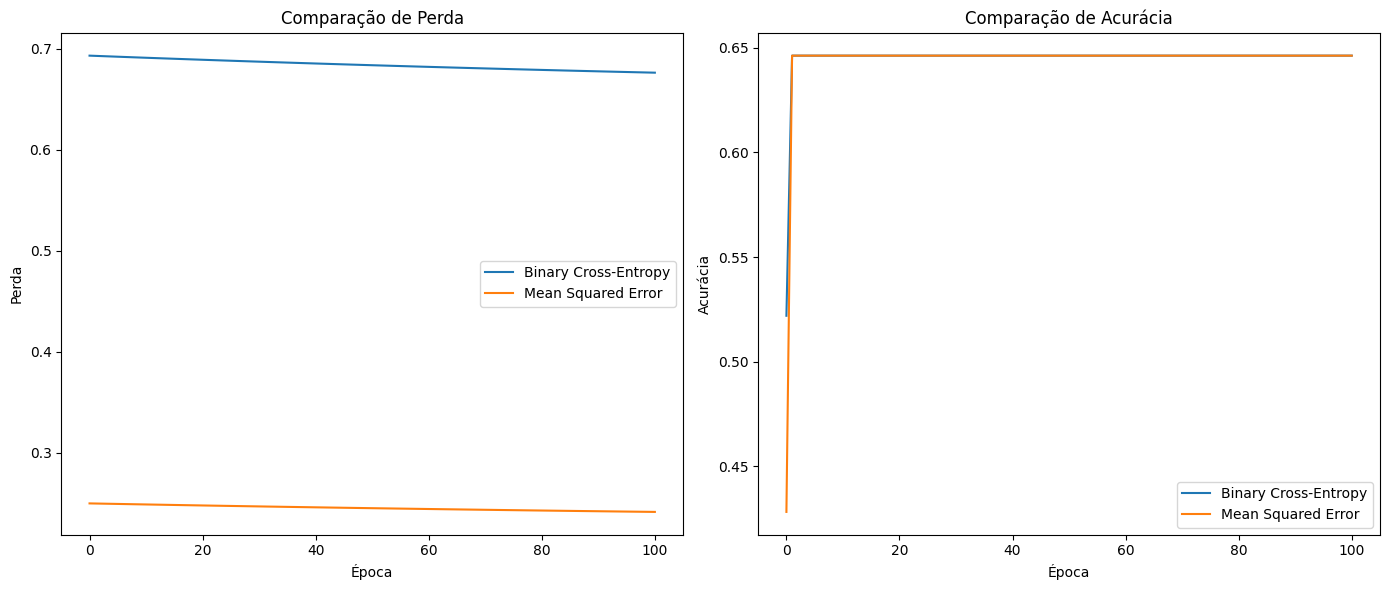

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Funções de ativação e derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Função de perda (Binary Cross-Entropy)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Função de perda para MSE (erro quadrático médio)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def plot_training_comparison(history_bce, history_mse):
    epochs = range(len(history_bce['loss']))

    # Gráfico de perda
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_bce['loss'], label='Binary Cross-Entropy')
    plt.plot(epochs, history_mse['loss'], label='Mean Squared Error')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.title('Comparação de Perda')
    plt.legend()

    # Gráfico de acurácia
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_bce['accuracy'], label='Binary Cross-Entropy')
    plt.plot(epochs, history_mse['accuracy'], label='Mean Squared Error')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.title('Comparação de Acurácia')
    plt.legend()

    plt.tight_layout()
    plt.show()

class NeuralNetwork:
    def __init__(self, layers, activations, loss_function, learning_rate=0.01):
        self.layers = layers
        self.activations = activations
        self.learning_rate = learning_rate
        self.loss_functions = {
            'binary_cross_entropy': binary_cross_entropy,
            'mse': mse
        }
        if loss_function not in self.loss_functions:
            raise ValueError(f"Função de perda '{loss_function}' não suportada.")
        self.loss_function = self.loss_functions[loss_function]
        self.activation_functions = {
            'sigmoid': (sigmoid, sigmoid_derivative),
            'relu': (relu, relu_derivative),
            'tanh': (tanh, tanh_derivative)
        }
        self.weights = [np.random.randn(layers[i], layers[i - 1]) * 0.01 for i in range(1, len(layers))]
        self.biases = [np.zeros((layers[i], 1)) for i in range(1, len(layers))]
        self.history = {'loss': [], 'accuracy': []}  # Para registrar as métricas por época

    def forward(self, X):
        self.a = [X.T]  # Ativações (saídas) por camada
        self.z = []     # Soma ponderada (z = W.a + b)

        for i in range(len(self.weights)):
            z = np.dot(self.weights[i], self.a[-1]) + self.biases[i]
            self.z.append(z)
            activation_function = self.activation_functions[self.activations[i]][0]
            self.a.append(activation_function(z))

        return self.a[-1].T  # Saída final da rede

    def backward(self, X, y):
        m = X.shape[0]
        y = y.reshape(-1, 1).T
        d_weights = [np.zeros_like(w) for w in self.weights]
        d_biases = [np.zeros_like(b) for b in self.biases]

        # Cálculo do erro na saída
        dz = self.a[-1] - y  # Erro na saída
        for i in reversed(range(len(self.weights))):
            dw = np.dot(dz, self.a[i].T) / m
            db = np.sum(dz, axis=1, keepdims=True) / m
            d_weights[i] = dw
            d_biases[i] = db

            if i > 0:  # Propagação do erro para trás
                activation_derivative = self.activation_functions[self.activations[i - 1]][1]
                dz = np.dot(self.weights[i].T, dz) * activation_derivative(self.z[i-1])

        # Atualização dos pesos e bias
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * d_weights[i]
            self.biases[i] -= self.learning_rate * d_biases[i]

    def train(self, X, y, epochs=100):
        print("Treinamento iniciado.")
        print(f"Funções de ativação usadas por camada: {self.activations}")
        print(f"Função de perda: {self.loss_function.__name__}")

        for epoch in range(epochs + 1):  # Inclui a época 0
            y_pred = self.forward(X)
            loss = self.loss_function(y, y_pred)
            self.history['loss'].append(loss)

            # Calcular acurácia (se aplicável)
            accuracy = np.mean((y_pred > 0.5).astype(int) == y.reshape(-1, 1))
            self.history['accuracy'].append(accuracy)

            self.backward(X, y)

            # Exibir progresso a cada 10 épocas
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

        print("Treinamento concluído.")

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

# Dados de treino e teste
train_data = pd.read_csv('alzheimer_train.csv')
test_data = pd.read_csv('alzheimer_test.csv')

X_train = train_data.drop(columns=['Diagnosis']).values
y_train = train_data['Diagnosis'].values
X_test = test_data.drop(columns=['Diagnosis']).values
y_test = test_data['Diagnosis'].values

# Treinar o primeiro modelo (Binary Cross-Entropy)
print("Treinando modelo com Binary Cross-Entropy...")
nn_bce = NeuralNetwork(
    layers=[X_train.shape[1], 10, 5, 1],
    activations=['relu', 'tanh', 'sigmoid'],
    loss_function='binary_cross_entropy',
    learning_rate=0.01
)
# Treinar o primeiro modelo (Binary Cross-Entropy)
print("Treinando modelo com Binary Cross-Entropy...")
nn_bce = NeuralNetwork(
    layers=[X_train.shape[1], 10, 5, 1],
    activations=['relu', 'tanh', 'sigmoid'],
    loss_function='binary_cross_entropy',
    learning_rate=0.01
)

nn_bce.train(X_train, y_train, epochs=100)

# Avaliar o modelo com BCE
y_pred_bce = nn_bce.predict(X_test)
accuracy_bce = accuracy_score(y_test, y_pred_bce)
print(f"Accuracy do modelo com Binary Cross-Entropy: {accuracy_bce:.2%}")

# Treinar o segundo modelo (Mean Squared Error)
print("\nTreinando modelo com Mean Squared Error...")
nn_mse = NeuralNetwork(
    layers=[X_train.shape[1], 10, 5, 1],
    activations=['relu', 'tanh', 'sigmoid'],
    loss_function='mse',
    learning_rate=0.01
)
nn_mse.train(X_train, y_train, epochs=100)

# Avaliar o modelo com MSE
y_pred_mse = nn_mse.predict(X_test)
accuracy_mse = accuracy_score(y_test, y_pred_mse)
print(f"Accuracy do modelo com Mean Squared Error: {accuracy_mse:.2%}")

# Plotar os gráficos de comparação
plot_training_comparison(nn_bce.history, nn_mse.history)


